In [1]:
from keras.datasets import cifar10
(x_train,_),(x_test,_)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


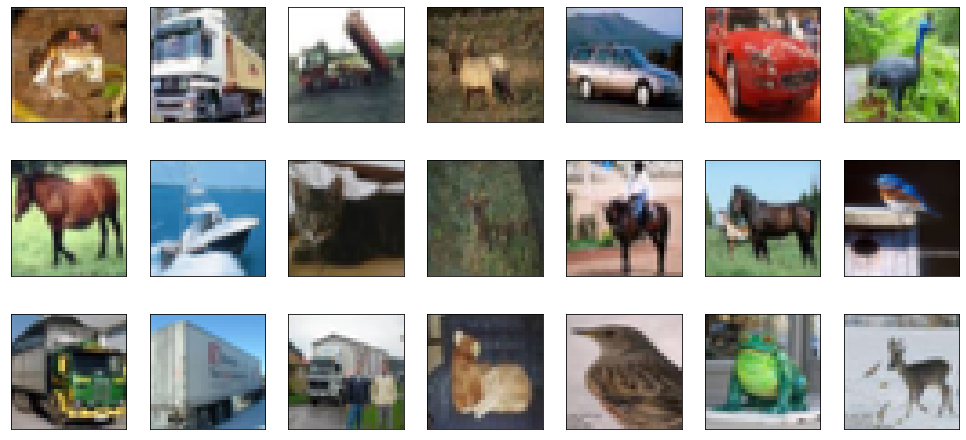

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].imshow(x_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [11]:
import numpy as np
import cv2
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

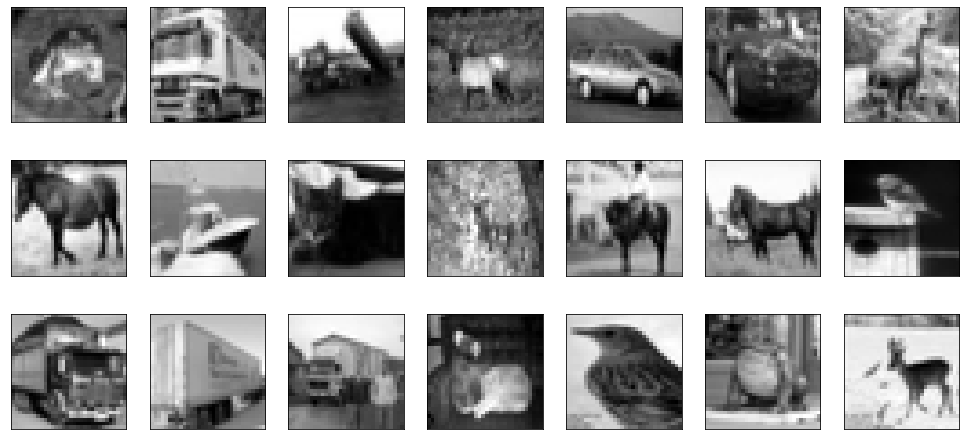

In [12]:
ig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].imshow(x_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [13]:
print(x_train.shape)

(50000, 32, 32)


In [14]:
def pre_process(X):
    X = X/255.0
    X = X.reshape((len(X), 1024))
    return X

x_train  =  pre_process(x_train)
x_test  =  pre_process(x_test)

print("X_train", x_train.shape)
print("X_test", x_test.shape)

X_train (50000, 1024)
X_test (10000, 1024)


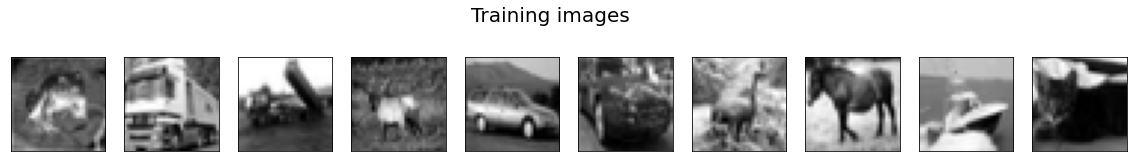

In [15]:
import matplotlib.pyplot as plt
def show_data(X, n=10, height=32, width=32 , title=""):
    plt.figure(figsize=(20, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

show_data(x_train,title="Training images")

In [16]:
from keras.layers import Input, Dense
from keras.models import Model

In [30]:
# encoder
input_layer = Input(shape=(1024,), name="INPUT")
hidden_layer_1 = Dense(512, activation='relu', name="HIDDEN_1")(input_layer)
hidden_layer_2 = Dense(256, activation='relu', name="HIDDEN_2")(hidden_layer_1)

# code
code_layer = Dense(150, activation='relu', name="CODE")(hidden_layer_2)

# decoder
hidden_layer_3 = Dense(256, activation='relu', name="HIDDEN_3")(code_layer)
hidden_layer_4 = Dense(512, activation='relu', name="HIDDEN_4")(hidden_layer_3 )
output_layer = Dense(1024, activation='sigmoid', name="OUTPUT")(hidden_layer_4)

In [31]:
stacked_autoencoder=Model(input_layer, output_layer)
stacked_autoencoder.compile(optimizer="Adam",loss="mse")
stacked_autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 1024)]            0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 512)               524800    
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 256)               131328    
_________________________________________________________________
CODE (Dense)                 (None, 150)               38550     
_________________________________________________________________
HIDDEN_3 (Dense)             (None, 256)               38656     
_________________________________________________________________
HIDDEN_4 (Dense)             (None, 512)               131584    
_________________________________________________________________
OUTPUT (Dense)               (None, 1024)              5253

In [32]:
stacked_autoencoder.fit(x_train, x_train, epochs=100,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/100
196/196 [==============================] - 11s 56ms/step - loss: 0.0426 - val_loss: 0.0243
Epoch 2/100
196/196 [==============================] - 11s 55ms/step - loss: 0.0208 - val_loss: 0.0182
Epoch 3/100
196/196 [==============================] - 11s 55ms/step - loss: 0.0169 - val_loss: 0.0148
Epoch 4/100
196/196 [==============================] - 11s 55ms/step - loss: 0.0146 - val_loss: 0.0146
Epoch 5/100
196/196 [==============================] - 11s 55ms/step - loss: 0.0137 - val_loss: 0.0132
Epoch 6/100
196/196 [==============================] - 11s 55ms/step - loss: 0.0127 - val_loss: 0.0125
Epoch 7/100
196/196 [==============================] - 11s 55ms/step - loss: 0.0119 - val_loss: 0.0115
Epoch 8/100
196/196 [==============================] - 11s 55ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 9/100
196/196 [==============================] - 11s 56ms/step - loss: 0.0108 - val_loss: 0.0104
Epoch 10/100
196/196 [==============================] - 11s 56ms/step - l

In [33]:
decoded_data = stacked_autoencoder.predict(x_test)

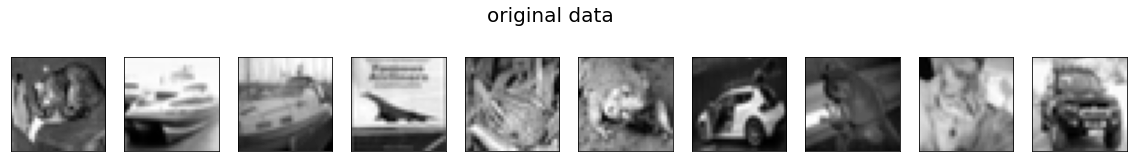

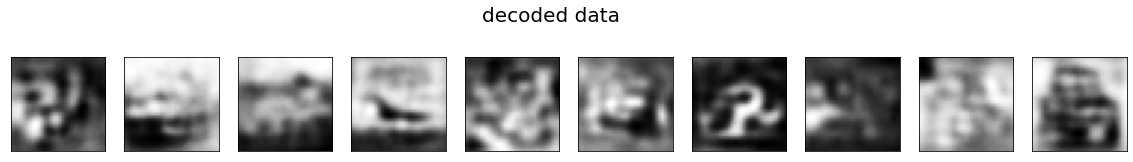

In [34]:
show_data(x_test, title="original data")
show_data(decoded_data, title="decoded data")